<a href="https://colab.research.google.com/github/pravinkumar150/Data-Science/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Accuracy Calculation using Confusion Matrix
## Accuracy = (TP+TN)/(TP+FN+FP+TN) 
## FP rate = FP/ (TN+FP) 
## TP rate = Recall = TP/ (TP+FN) 
## Precision = TP/ (TP+FP) 

In [ ]:
# ROC curves :
# Receiver Operating Curve it can summarize the classification performance overa a tradeoff between TruePostive(TP) and FalsePositive(FP)
# AOC curves:
# It is acceptence performane metrix for ROC curve (Threshold)

# INCOME_TYPE       1696
# EDUCATION_TYPE    4973


In [ ]:
# Required Libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline 

In [ ]:
data = pd.read_csv('credit_dataset.csv')

In [ ]:
data.head()

,Unnamed: 0,ID,GENDER,CAR,REALITY,NO_OF_CHILD,INCOME,INCOME_TYPE,EDUCATION_TYPE,FAMILY_TYPE,HOUSE_TYPE,FLAG_MOBIL,WORK_PHONE,PHONE,E_MAIL,FAMILY SIZE,BEGIN_MONTH,AGE,YEARS_EMPLOYED,TARGET
0,0,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,1,0,0,0,2.0,29,59,3,0
1,1,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,1.0,4,52,8,0
2,2,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,1.0,26,52,8,0
3,3,5008810,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,1.0,26,52,8,0
4,4,5008811,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,1.0,38,52,8,0


In [ ]:
data['TARGET'].value_counts()

0    24712
1      422
Name: TARGET, dtype: int64

In [ ]:
# 0 - it refered as Majority 
# 1 - it refered as Minority 
# cause difference between them are huge 

In [ ]:
data.shape

(25134, 20)

In [ ]:
data.describe()

,Unnamed: 0,ID,NO_OF_CHILD,INCOME,FLAG_MOBIL,WORK_PHONE,PHONE,E_MAIL,FAMILY SIZE,BEGIN_MONTH,AGE,YEARS_EMPLOYED,TARGET
count,25134.000000,2.513400e+04,25134.000000,2.513400e+04,25134.0,25134.000000,25134.000000,25134.000000,25134.000000,25134.000000,25134.000000,25134.000000,25134.000000
mean,12566.500000,5.078838e+06,0.512334,1.948339e+05,1.0,0.273812,0.292791,0.100660,2.294064,26.120594,40.536166,7.204106,0.016790
std,7255.705169,4.194102e+04,0.787785,1.045110e+05,0.0,0.445923,0.455052,0.300885,0.947590,16.439658,9.559474,6.414231,0.128486
min,0.000000,5.008806e+06,0.000000,2.700000e+04,1.0,0.000000,0.000000,0.000000,1.000000,0.000000,21.000000,0.000000,0.000000
25%,6283.250000,5.042228e+06,0.000000,1.350000e+05,1.0,0.000000,0.000000,0.000000,2.000000,12.000000,33.000000,3.000000,0.000000
50%,12566.500000,5.079004e+06,0.000000,1.800000e+05,1.0,0.000000,0.000000,0.000000,2.000000,24.000000,40.000000,5.000000,0.000000
75%,18849.750000,5.115604e+06,1.000000,2.250000e+05,1.0,1.000000,1.000000,0.000000,3.000000,39.000000,48.000000,10.000000,0.000000
max,25133.000000,5.150487e+06,19.000000,1.575000e+06,1.0,1.000000,1.000000,1.000000,20.000000,60.000000,67.000000,43.000000,1.000000


In [ ]:
data.columns

Index(['Unnamed: 0', 'ID', 'GENDER', 'CAR', 'REALITY', 'NO_OF_CHILD', 'INCOME',
       'INCOME_TYPE', 'EDUCATION_TYPE', 'FAMILY_TYPE', 'HOUSE_TYPE',
       'FLAG_MOBIL', 'WORK_PHONE', 'PHONE', 'E_MAIL', 'FAMILY SIZE',
       'BEGIN_MONTH', 'AGE', 'YEARS_EMPLOYED', 'TARGET'],
      dtype='object')

In [ ]:
print(data.select_dtypes('int').columns)

Index(['Unnamed: 0', 'ID', 'NO_OF_CHILD', 'FLAG_MOBIL', 'WORK_PHONE', 'PHONE',
       'E_MAIL', 'BEGIN_MONTH', 'AGE', 'YEARS_EMPLOYED', 'TARGET'],
      dtype='object')


In [ ]:
print(data.select_dtypes('object').columns)

Index(['GENDER', 'CAR', 'REALITY', 'INCOME_TYPE', 'EDUCATION_TYPE',
       'FAMILY_TYPE', 'HOUSE_TYPE'],
      dtype='object')


In [ ]:
data.isnull().sum()

Unnamed: 0        0
ID                0
GENDER            0
CAR               0
REALITY           0
NO_OF_CHILD       0
INCOME            0
INCOME_TYPE       0
EDUCATION_TYPE    0
FAMILY_TYPE       0
HOUSE_TYPE        0
FLAG_MOBIL        0
WORK_PHONE        0
PHONE             0
E_MAIL            0
FAMILY SIZE       0
BEGIN_MONTH       0
AGE               0
YEARS_EMPLOYED    0
TARGET            0
dtype: int64

# Feature Engineering 

In [ ]:
data['GENDER'] = data['GENDER'].replace({'F':0,'M':1})

In [ ]:
data['CAR'] = data['CAR'].replace({'N':0,'Y':1})

In [ ]:
data['REALITY'] = data['REALITY'].replace({'Y':0,'N':1})

In [ ]:
def income_type(data):
  if data == 'Working' : return 0
  if data == 'Commercial associate': return 1 
  if data == 'State servent' : return 2 
  if data == 'Pensioner' : return 3
  if data == 'Student' : return 4

In [ ]:
data['INCOME_TYPE'] = data['INCOME_TYPE'].apply(income_type)

In [ ]:
def education_type(x):
  if x == 'Secondary / secondary special': return 0 
  if x == 'Higher education ': return 1
  if x == 'Incomplete higher': return 2
  if x == 'Lower secondary': return 3 
  if x == 'Academic degree': return 4 
  # pass

In [ ]:
data['EDUCATION_TYPE'] = data['EDUCATION_TYPE'].apply(education_type)

In [ ]:
def family_type(x):
  if x == 'Married': return 0 
  if x == 'Single / not married': return 1 
  if x == 'Civil marriage': return 2
  if x == 'Separated': return 3 
  if x == 'Widow': return 4
  

In [ ]:
data['FAMILY_TYPE'] = data['FAMILY_TYPE'].apply(family_type)

In [ ]:
def house_type(data):
  if data == 'House / apartment': return 0 
  if data == 'With parents': return 1
  if data == 'Municipal apartment': return 2
  if data == 'Rented apartment': return 3
  if data == 'Office apartment': return 4
  if data == 'Co-op apartment': return 5


In [ ]:
data['HOUSE_TYPE'] = data['HOUSE_TYPE'].apply(house_type)

# After Feature Engineering Numeric datatypes

In [ ]:
data.head()

,Unnamed: 0,ID,GENDER,CAR,REALITY,NO_OF_CHILD,INCOME,INCOME_TYPE,EDUCATION_TYPE,FAMILY_TYPE,HOUSE_TYPE,FLAG_MOBIL,WORK_PHONE,PHONE,E_MAIL,FAMILY SIZE,BEGIN_MONTH,AGE,YEARS_EMPLOYED,TARGET
0,0,5008806,1,1,0,0,112500.0,0.0,0.0,0,0,1,0,0,0,2.0,29,59,3,0
1,1,5008808,0,0,0,0,270000.0,1.0,0.0,1,0,1,0,1,1,1.0,4,52,8,0
2,2,5008809,0,0,0,0,270000.0,1.0,0.0,1,0,1,0,1,1,1.0,26,52,8,0
3,3,5008810,0,0,0,0,270000.0,1.0,0.0,1,0,1,0,1,1,1.0,26,52,8,0
4,4,5008811,0,0,0,0,270000.0,1.0,0.0,1,0,1,0,1,1,1.0,38,52,8,0


# Remove or Resolve the NaN values

In [ ]:
data['INCOME_TYPE'] = data['INCOME_TYPE'].fillna(0)
data['EDUCATION_TYPE'] = data['EDUCATION_TYPE'].fillna(0.0)

In [ ]:
data.isnull().sum()

Unnamed: 0        0
ID                0
GENDER            0
CAR               0
REALITY           0
NO_OF_CHILD       0
INCOME            0
INCOME_TYPE       0
EDUCATION_TYPE    0
FAMILY_TYPE       0
HOUSE_TYPE        0
FLAG_MOBIL        0
WORK_PHONE        0
PHONE             0
E_MAIL            0
FAMILY SIZE       0
BEGIN_MONTH       0
AGE               0
YEARS_EMPLOYED    0
TARGET            0
dtype: int64

# To find the correlation between independent and dependent variables using heatmap

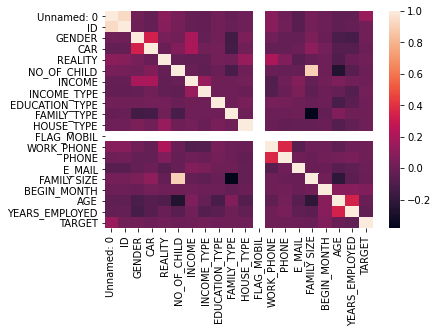

In [ ]:
sns.heatmap(data.corr())

# Feature Selection 

In [ ]:
data = data.drop(columns=['Unnamed: 0', 'ID', 'CAR', 'E_MAIL'], axis=1)

In [ ]:
data.columns

Index(['GENDER', 'REALITY', 'NO_OF_CHILD', 'INCOME', 'INCOME_TYPE',
       'EDUCATION_TYPE', 'FAMILY_TYPE', 'HOUSE_TYPE', 'FLAG_MOBIL',
       'WORK_PHONE', 'PHONE', 'FAMILY SIZE', 'BEGIN_MONTH', 'AGE',
       'YEARS_EMPLOYED', 'TARGET'],
      dtype='object')

In [ ]:
data.head()

,GENDER,REALITY,NO_OF_CHILD,INCOME,INCOME_TYPE,EDUCATION_TYPE,FAMILY_TYPE,HOUSE_TYPE,FLAG_MOBIL,WORK_PHONE,PHONE,FAMILY SIZE,BEGIN_MONTH,AGE,YEARS_EMPLOYED,TARGET
0,1,0,0,112500.0,0.0,0.0,0,0,1,0,0,2.0,29,59,3,0
1,0,0,0,270000.0,1.0,0.0,1,0,1,0,1,1.0,4,52,8,0
2,0,0,0,270000.0,1.0,0.0,1,0,1,0,1,1.0,26,52,8,0
3,0,0,0,270000.0,1.0,0.0,1,0,1,0,1,1.0,26,52,8,0
4,0,0,0,270000.0,1.0,0.0,1,0,1,0,1,1.0,38,52,8,0


In [ ]:
correlation = {}
def find_correlation(cols,target):
  for i in cols:
    correlation[i] = data[i].corr(data[target])
    # print(f"The Correlation between {i} and TARGET : {data[i].corr(data['TARGET'])}")


In [ ]:
cols = data.columns
cols = cols[:-1]
find_correlation(cols, 'TARGET')

In [ ]:
correlation = pd.DataFrame({'Target':correlation}, index=None)
pd.set_option('display.max_rows',None)
correlation.head(None)

,Target
AGE,-0.007880
BEGIN_MONTH,0.060713
EDUCATION_TYPE,0.010682
FAMILY SIZE,-0.005587
FAMILY_TYPE,0.002939
FLAG_MOBIL,NaN
GENDER,0.020708
HOUSE_TYPE,0.006788
INCOME,0.006530
INCOME_TYPE,0.025793


In [ ]:
data.head()

,GENDER,REALITY,NO_OF_CHILD,INCOME,INCOME_TYPE,EDUCATION_TYPE,FAMILY_TYPE,HOUSE_TYPE,FLAG_MOBIL,WORK_PHONE,PHONE,FAMILY SIZE,BEGIN_MONTH,AGE,YEARS_EMPLOYED,TARGET
0,1,0,0,112500.0,0.0,0.0,0,0,1,0,0,2.0,29,59,3,0
1,0,0,0,270000.0,1.0,0.0,1,0,1,0,1,1.0,4,52,8,0
2,0,0,0,270000.0,1.0,0.0,1,0,1,0,1,1.0,26,52,8,0
3,0,0,0,270000.0,1.0,0.0,1,0,1,0,1,1.0,26,52,8,0
4,0,0,0,270000.0,1.0,0.0,1,0,1,0,1,1.0,38,52,8,0


In [ ]:
# import algorithms 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.utils import resample 
from scipy.stats import norm, skew
import warnings 
warnings.filterwarnings('ignore')

In [ ]:
skewed_features = data.apply(lambda x: skew(x.dropna())).sort_values(ascending=False)

In [ ]:
skewed_features

TARGET            7.521723
EDUCATION_TYPE    4.572926
HOUSE_TYPE        3.847176
INCOME            2.964071
NO_OF_CHILD       2.489003
FAMILY_TYPE       1.774468
YEARS_EMPLOYED    1.730490
FAMILY SIZE       1.305858
INCOME_TYPE       1.211308
WORK_PHONE        1.014490
PHONE             0.910724
REALITY           0.651798
GENDER            0.502625
BEGIN_MONTH       0.290778
AGE               0.265394
FLAG_MOBIL        0.000000
dtype: float64

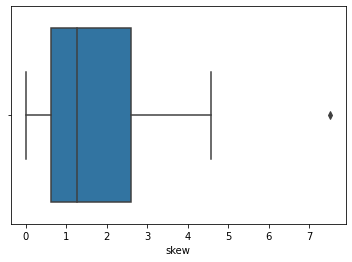

In [ ]:
skewness = pd.DataFrame({'skew':skewed_features})
sns.boxplot(skewness['skew'])

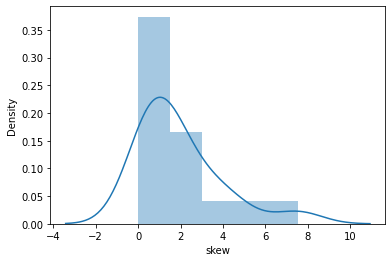

In [ ]:
sns.distplot(skewness['skew'])

In [ ]:
# from scipy.special import boxcox1p
# lam=0.15
# skewness_features = skewness.index
# for feat in skewed_features:
#     data[feat] = boxcox1p(data[feat], lam)

In [ ]:
pd.set_option('display.max_rows',None)
skewness.head(None)

,skew
TARGET,7.521723
EDUCATION_TYPE,4.572926
HOUSE_TYPE,3.847176
INCOME,2.964071
NO_OF_CHILD,2.489003
FAMILY_TYPE,1.774468
YEARS_EMPLOYED,1.730490
FAMILY SIZE,1.305858
INCOME_TYPE,1.211308
WORK_PHONE,1.014490


In [ ]:
X = data.drop('TARGET', axis=1)
y = data['TARGET']

In [ ]:
print(X.shape, y.shape)

(25134, 15) (25134,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42, test_size=.3)

In [ ]:
# combinig data for resampling 
train_data = pd.concat([X_train,y_train], axis=1)

In [ ]:
# seperate minority and majority classes 
# 0    24712
# 1      422
positive = train_data[train_data.TARGET == 1] # Minority 
negative = train_data[train_data.TARGET == 0] # Mejority 
print(f'Length of the Minority class : {len(positive)}\nLength of the Mejority class : {len(negative)}')


Length of the Minority class : 291
Length of the Mejority class : 17302


# RandomForestClassifier

In [ ]:
model = RandomForestClassifier(n_estimators=100)

In [ ]:
model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
predict = model.predict(X_test)

In [ ]:
from sklearn import metrics

In [ ]:
metrics.confusion_matrix(y_test, predict)

array([[7395,   15],
       [ 118,   13]])

In [ ]:
print(f"The accuracy score for y_test and predict => {metrics.accuracy_score(y_test,predict)}")

The accuracy score for y_test and predict => 0.9823630818193874


In [ ]:
print(f"The accuracy score for y_test and predict => {metrics.classification_report(y_test,predict)}")

The accuracy score for y_test and predict =>               precision    recall  f1-score   support

           0       0.98      1.00      0.99      7410
           1       0.46      0.10      0.16       131

    accuracy                           0.98      7541
   macro avg       0.72      0.55      0.58      7541
weighted avg       0.98      0.98      0.98      7541



In [ ]:
model_2 = RandomForestClassifier(n_estimators=100)
model_2.fit(X,y)
predict = model_2.predict(X_test)
metrics.confusion_matrix(y_test, predict)

array([[7408,    2],
       [   9,  122]])

In [ ]:
print(f"The accuracy score for y_test and predict => {metrics.classification_report(y_test,predict)}")

The accuracy score for y_test and predict =>               precision    recall  f1-score   support

           0       1.00      1.00      1.00      7410
           1       0.98      0.93      0.96       131

    accuracy                           1.00      7541
   macro avg       0.99      0.97      0.98      7541
weighted avg       1.00      1.00      1.00      7541



In [ ]:
print(f"The accuracy score for y_test and predict => {metrics.accuracy_score(y_test,predict)}")

The accuracy score for y_test and predict => 0.9985413075188967


# LogisticRegression 

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lg = LogisticRegression()
lg.fit(X_train, y_train)
y_pred = lg.predict(X_test)
print(f"The accuracy score for y_test and y_pred => {metrics.classification_report(y_test,y_pred)}")

The accuracy score for y_test and y_pred =>               precision    recall  f1-score   support

           0       0.98      1.00      0.99      7410
           1       0.00      0.00      0.00       131

    accuracy                           0.98      7541
   macro avg       0.49      0.50      0.50      7541
weighted avg       0.97      0.98      0.97      7541



# Over sampling 

In [ ]:
# UP sample the minority 
# random_state -> reprodusable results 
# n_sample -> match count in majority class 
# replace -> sample with replacement 
positive_upsampled = resample(positive, replace=True, n_samples=len(negative),random_state=27)
print(len(positive_upsampled))

17302


# Under Sampling

In [ ]:
negative_downsampled = resample(negative, replace=True, n_samples=len(positive), random_state=27)
print(len(negative_downsampled))

291


# SMOTE or SYNTHETIC MINORITY OVERSAMPLING TECHNIQUE

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
smote = SMOTE(ratio=1.0, random_state=27)

In [ ]:
X_train, y_train = smote.fit_sample(X_train, y_train)

In [ ]:
print(X_train.shape, y_train.shape)

(34604, 15) (34604,)


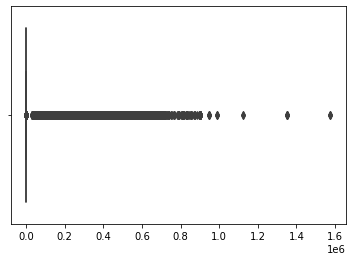

In [ ]:
sns.boxplot(X_train)